# 5장. 계절성 처리

## 가산형 vs 곱셉형 계절성(Understanding additive versus multiplicative seasonality)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('/content/drive/MyDrive/Book7/data/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

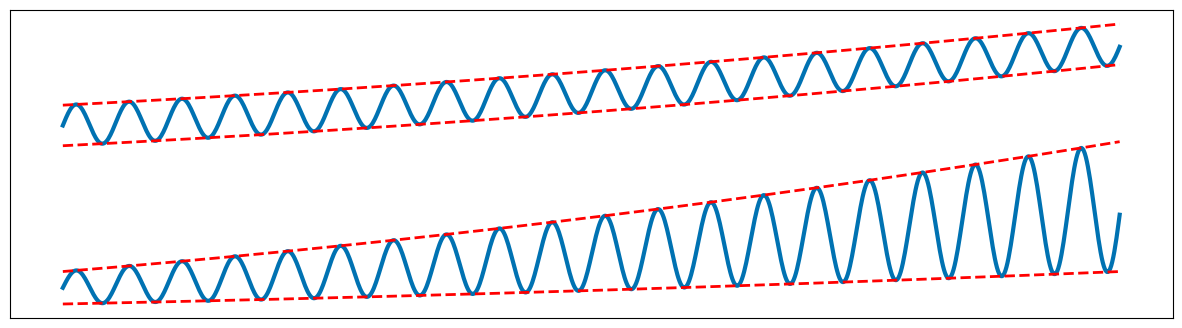

In [ ]:
import numpy as np

multiplier = 5
spread = 3
separation = 10 * spread

x = np.linspace(1, 2, 1000)
y0 = [multiplier * val**2 for val in x]
y1 = [np.sin(idx * 7.2 * np.pi / 180) for idx in range(len(x))]

y = [y0[idx] + 1.25 * spread * y1[idx] for idx in range(len(x))]
upper = [y0[idx] + 1.25 * spread for idx in range(len(x))]
lower = [y0[idx] - 1.25 * spread for idx in range(len(x))]

plt.figure(figsize=(15, 4))
plt.plot(x, y, c='#0072B2', lw=3)
plt.plot(x, upper, c='r', lw=2, ls='--')
plt.plot(x, lower, c='r', lw=2, ls='--')

y = [y0[idx] + spread / multiplier * y0[idx] * y1[idx] - separation for idx in range(len(x))]
upper = [(multiplier + spread) * val**2 - separation for val in x]
lower = [(multiplier - spread) * val**2 - separation for val in x]

plt.plot(x, y, c='#0072B2', lw=3)
plt.plot(x, upper, c='r', lw=2, ls='--')
plt.plot(x, lower, c='r', lw=2, ls='--')

plt.xticks([])
plt.yticks([])
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/fgh9e771.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/112bh7x6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59106', 'data', 'file=/tmp/tmplefug71y/fgh9e771.json', 'init=/tmp/tmplefug71y/112bh7x6.json', 'output', 'file=/tmp/tmplefug71y/prophet_modelegl34j63/prophet_model-20250709012106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


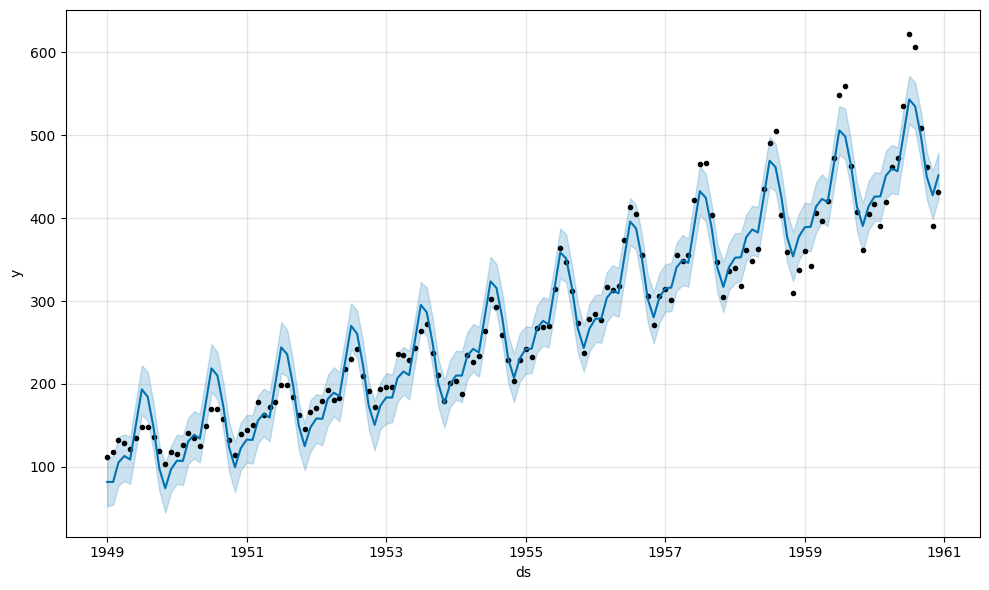

In [ ]:
model_a = Prophet(seasonality_mode='additive',
                  yearly_seasonality=4)
model_a.fit(df)
forecast_a = model_a.predict()
fig_a = model_a.plot(forecast_a)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/e_9imm1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/bpmscgtt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76104', 'data', 'file=/tmp/tmplefug71y/e_9imm1p.json', 'init=/tmp/tmplefug71y/bpmscgtt.json', 'output', 'file=/tmp/tmplefug71y/prophet_model14xzs957/prophet_model-20250709012110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


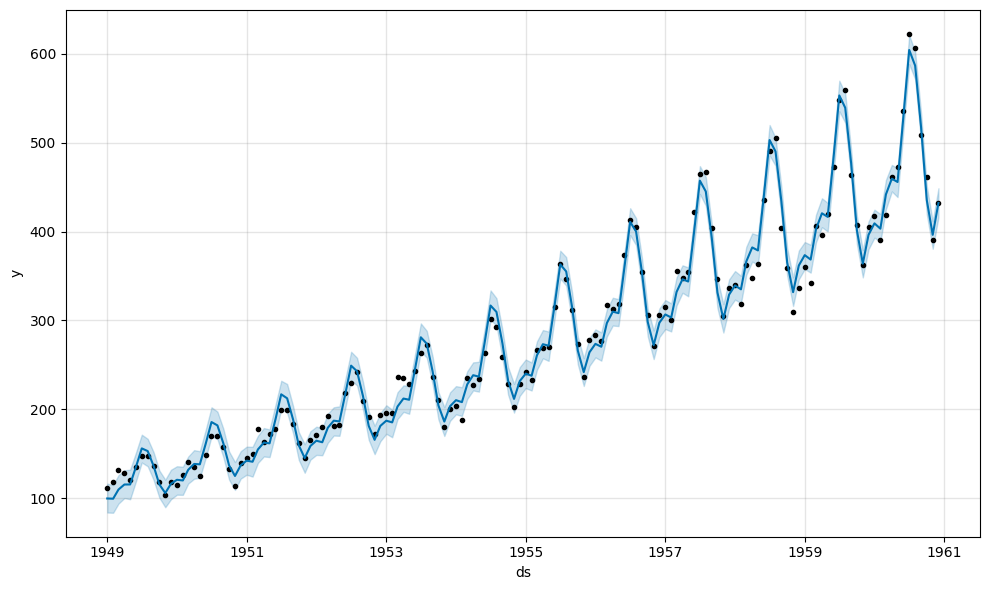

In [ ]:
model_m = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=4)
model_m.fit(df)
forecast_m = model_m.predict()
fig_m = model_m.plot(forecast_m)
plt.show()

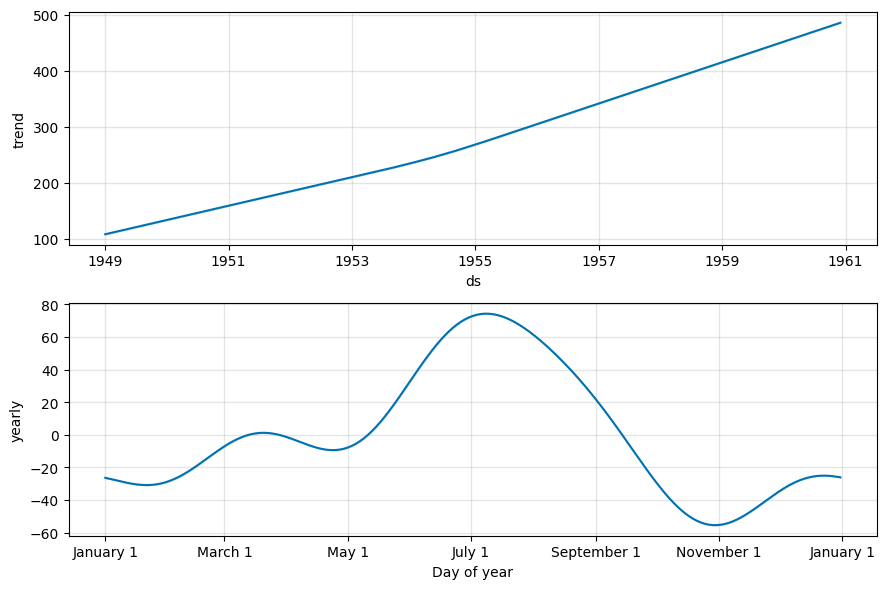

In [ ]:
fig_a2 = model_a.plot_components(forecast_a)
plt.show()

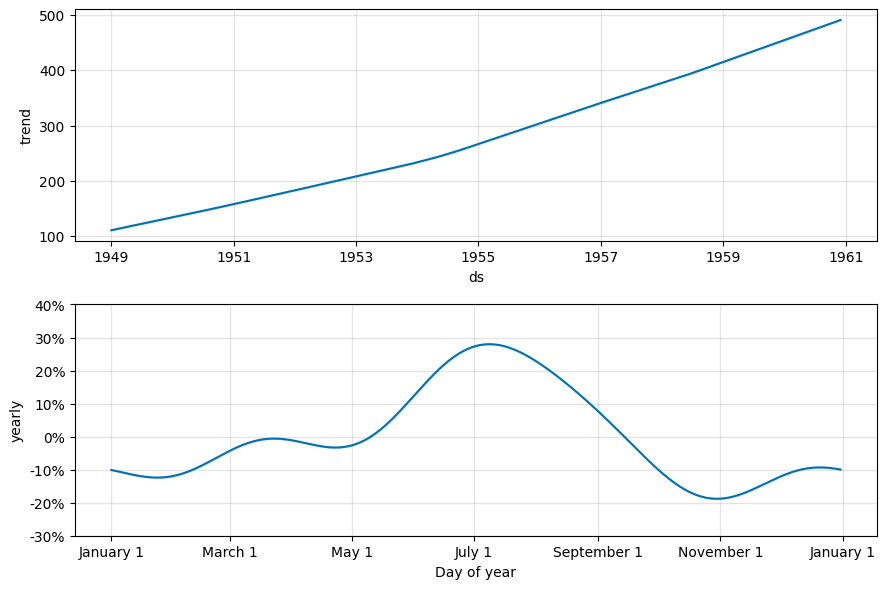

In [ ]:
fig_m2 = model_m.plot_components(forecast_m)
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_daily.csv')
df.head()

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow


In [ ]:
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

/tmp/ipython-input-10-1887748380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


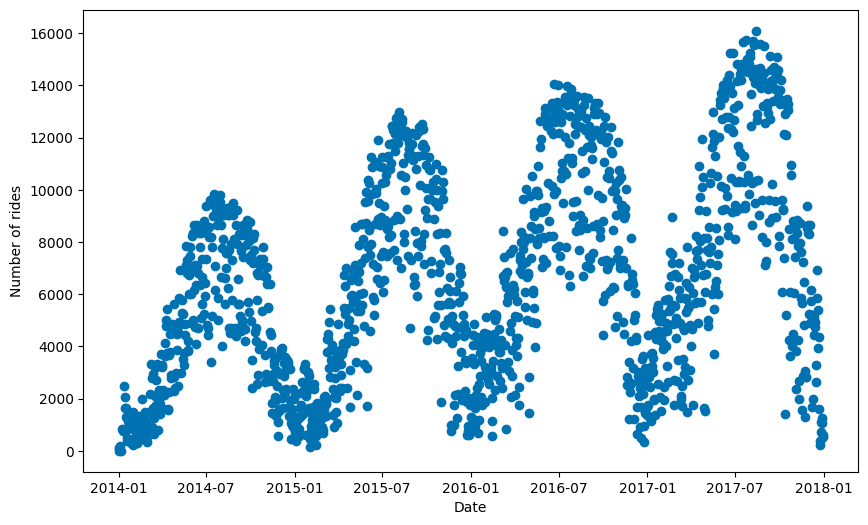

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/q6dgab0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/puw3pdgq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43330', 'data', 'file=/tmp/tmplefug71y/q6dgab0_.json', 'init=/tmp/tmplefug71y/puw3pdgq.json', 'output', 'file=/tmp/tmplefug71y/prophet_modelzgr62j1c/prophet_model-20250709012131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


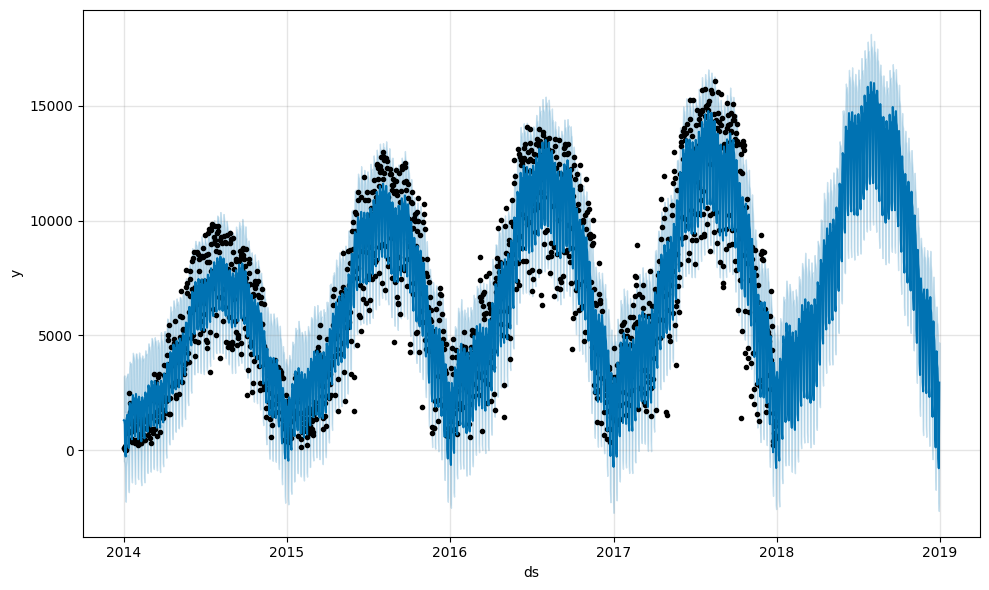

In [ ]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

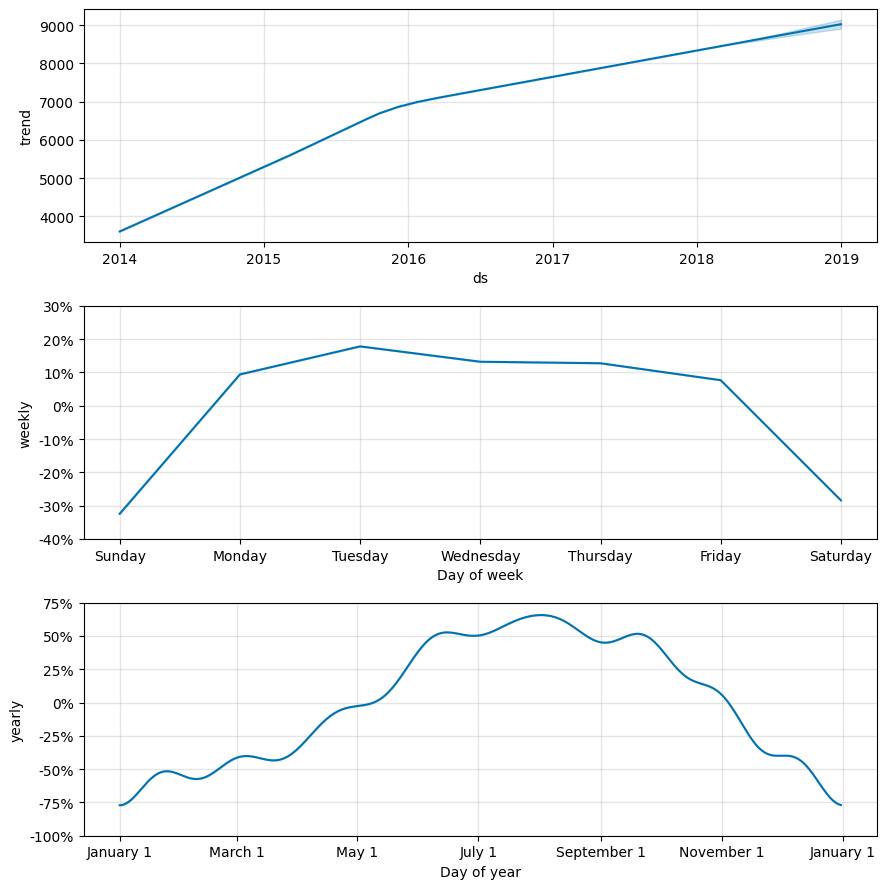

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

## 푸리에 차수로 계절성 조정(Controlling seasonality with Fourier order)

/tmp/ipython-input-14-1439232182.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x2, model10.params[0] +
/tmp/ipython-input-14-1439232182.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model10.params[1] * x2 +
/tmp/ipython-input-14-1439232182.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model10.params[2] * x2**2 +
/tmp/ipython-input-14-1439232182.py:31: FutureWarning: Series.__getitem__ treating keys as p

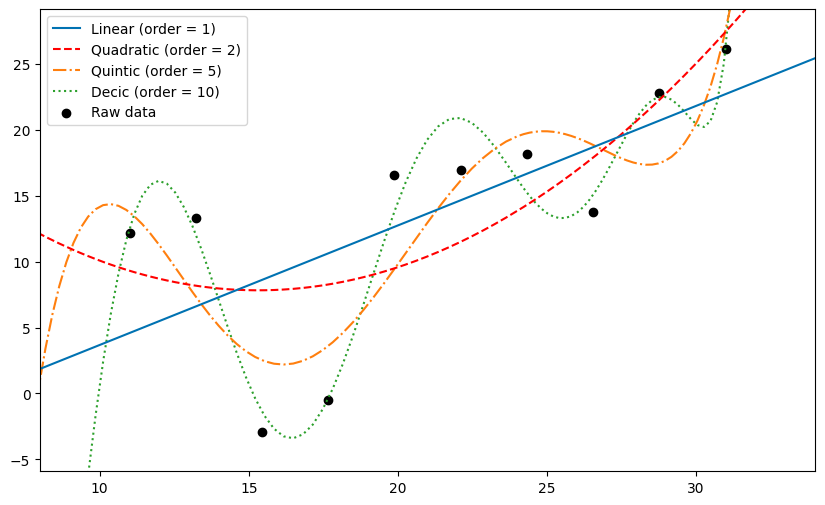

In [ ]:
import statsmodels.formula.api as sm
import random
random.seed(2)

x = np.linspace(11, 31, 10)
y = np.array([.025 * val**2 + random.uniform(-10, 10) for val in x])
data = {"x": x, "y": y}
x2 = np.array([.025 * val**2 for val in np.linspace(1, 11, 80)] +
              [.025 * val**2 for val in np.linspace(11, 31, 80)] +
              [.025 * val**2 for val in np.linspace(31, 41, 80)])

model1 = sm.ols(formula = 'y ~ x', data = data).fit()
model2 = sm.ols(formula = 'y ~ np.power(x, 2) + x', data = data).fit()
model5 = sm.ols(formula = 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4) + np.power(x, 5) + x', data = data).fit()
model10 = sm.ols(formula = 'y ~ x + np.power(x, 2) + \
                                     np.power(x, 3) + \
                                     np.power(x, 4) + \
                                     np.power(x, 5) + \
                                     np.power(x, 6) + \
                                     np.power(x, 7) + \
                                     np.power(x, 8) + \
                                     np.power(x, 9) + \
                                     np.power(x, 10)', data = data).fit()

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Raw data', c='k')

plt.plot(x2, model10.params[0] +
             model10.params[1] * x2 +
             model10.params[2] * x2**2 +
             model10.params[3] * x2**3 +
             model10.params[4] * x2**4 +
             model10.params[5] * x2**5 +
             model10.params[6] * x2**6 +
             model10.params[7] * x2**7 +
             model10.params[8] * x2**8 +
             model10.params[9] * x2**9 +
             model10.params[10] * x2**10,
         label='Decic (order = 10)', c='tab:green', ls=':')

plt.plot(x2, model5.params[0] +
             model5.params[1] * x2 +
             model5.params[2] * x2**2 +
             model5.params[3] * x2**3 +
             model5.params[4] * x2**4 +
             model5.params[5] * x2**5,
         label='Quintic (order = 5)', c='tab:orange', ls='-.')

plt.plot(x2, model2.params[0] +
             model2.params[1] * x2**2 +
             model2.params[2] * x2,
         label='Quadratic (order = 2)', c='r', ls='--')

plt.plot(x2, model1.params[0] +
             model1.params[1] * x2,
         label='Linear (order = 1)', c='#0072B2', ls='-')

plt.ylim(-5, 35)
handles, labels = plt.gca().get_legend_handles_labels()
# 에러 발생 코드 수정: reversed()의 결과를 list()로 변환하여 전달
# 오리지널 코드: plt.legend(reversed(handles), reversed(labels))
plt.legend(list(reversed(handles)), list(reversed(labels)))

plt.xlim(x.min() - 3, x.max() + 3)
plt.ylim(y.min() - 3, y.max() + 3)
plt.show()

/tmp/ipython-input-15-226939606.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  x = pd.date_range('2000-01-01', '2001-01-01', freq='H')


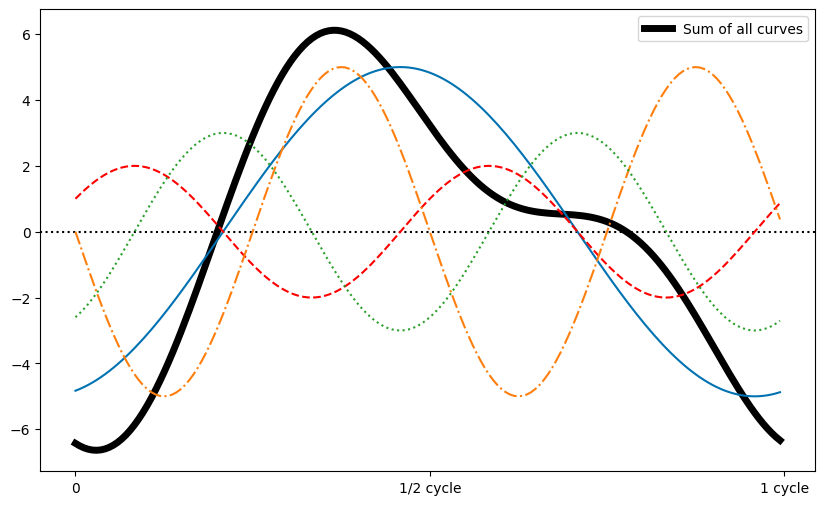

In [ ]:
x = pd.date_range('2000-01-01', '2001-01-01', freq='H')
x = range(24 * 7)
y0 = [(-5 * np.sin(((idx / 7) - 17) * (360 / 24) * (np.pi / 180))) for idx in range(len(x))]
y1 = [(-2 * np.sin(((idx / 7) - 5) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y2 = [(-5 * np.sin(((idx / 7) - 12) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y3 = [(-3 * np.sin(((idx / 7) - 20) * (360 / 12) * (np.pi / 180))) for idx in range(len(x))]
y = [y0[idx] + y1[idx] + y2[idx] + y3[idx] for idx in range(len(x))]

plt.figure(figsize=(10, 6))
plt.axhline(0, ls=':', c='k')
plt.plot(y, lw=5, c='k', label='Sum of all curves')
plt.plot(y0, c='#0072B2', ls='-')
plt.plot(y1, c='r', ls='--')
plt.plot(y2, c='tab:orange', ls='-.')
plt.plot(y3, c='tab:green', ls=':')
plt.legend()
plt.xticks(ticks=[0, 84, 168], labels=[0, '1/2 cycle', '1 cycle'])
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/oxdk68j8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/_gcl928l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87210', 'data', 'file=/tmp/tmplefug71y/oxdk68j8.json', 'init=/tmp/tmplefug71y/_gcl928l.json', 'output', 'file=/tmp/tmplefug71y/prophet_modeln7uso69v/prophet_model-20250709012158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_yearly

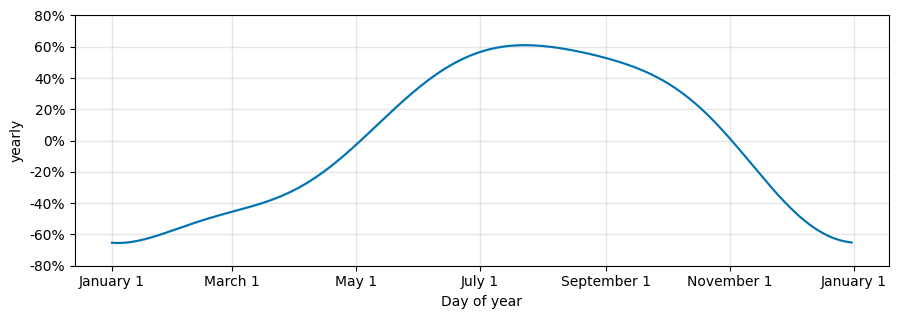

In [ ]:
fig3 = plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

## 커스텀 계절성 추가(Adding custom seasonalities)

In [ ]:
### 역자 수정 코드
import pandas as pd

# CSV 파일 읽기 (Date 컬럼이 다양한 형식을 가질 가능성이 있음)
df = pd.read_csv('/content/drive/MyDrive/Book7/data/sunspots.csv',
                 usecols=['Date', 'Monthly Mean Total Sunspot Number'])

# 날짜 변환 (자동 형식 감지)
df['Date'] = pd.to_datetime(df['Date'], format='mixed',
                            errors='coerce')

# 컬럼명 변경 (Prophet 모델을 위한 명명법)
df.columns = ['ds', 'y']

"""
# 변환된 데이터 확인
import ace_tools as tools
tools.display_dataframe_to_user(name="Sunspot Data", dataframe=df)
"""

'\n# 변환된 데이터 확인\nimport ace_tools as tools\ntools.display_dataframe_to_user(name="Sunspot Data", dataframe=df)\n'

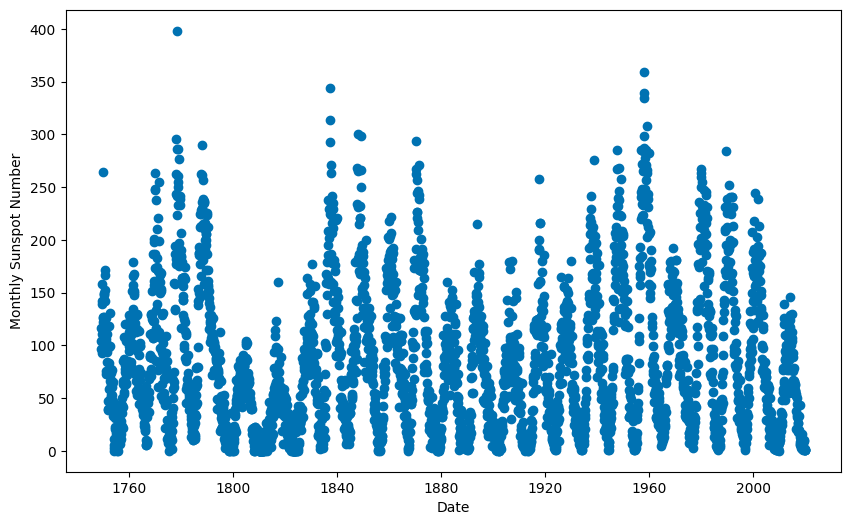

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Monthly Sunspot Number')
plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=False)

In [ ]:
model.add_seasonality(name='11-year cycle',
                      period=11 * 365.25,
                      fourier_order=5)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/6wppxgm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/hixvlgwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83964', 'data', 'file=/tmp/tmplefug71y/6wppxgm_.json', 'init=/tmp/tmplefug71y/hixvlgwz.json', 'output', 'file=/tmp/tmplefug71y/prophet_model6swbmp0_/prophet_model-20250709012243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:22:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

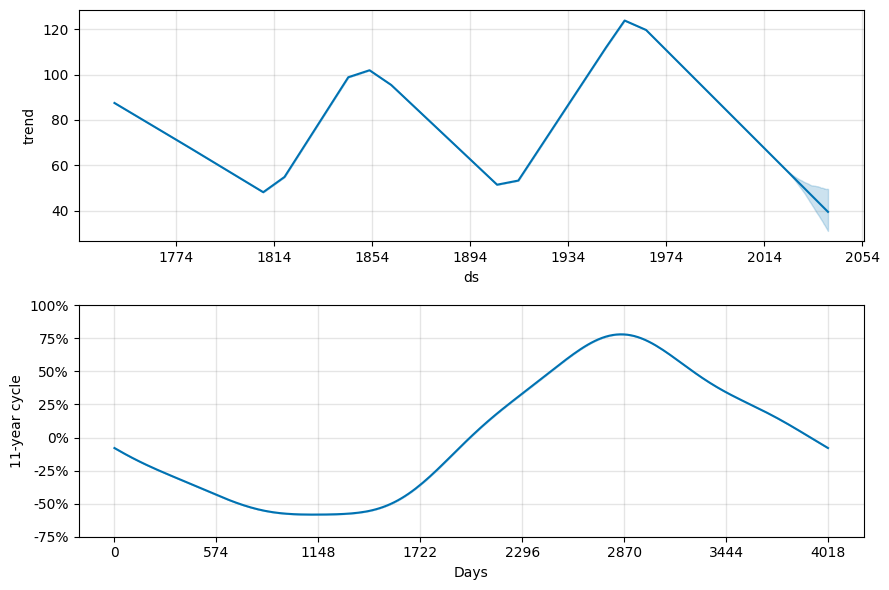

In [ ]:
model.fit(df)
future = model.make_future_dataframe(periods=240, freq='M')
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
model.seasonalities

OrderedDict([('11-year cycle',
              {'period': 4017.75,
               'fourier_order': 5,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [ ]:
### 원서에서 시간별 계절성 추가 설명을 위해 언급한 코드이며 예시만을 위한 코드이므로
### 이 코드는 실행하지 말아 주세요.
model.add_seasonality(name='hourly',
                      # 한 시간은 0.04167 day임
                      period= 1/24,
                      fourier_order=5)

In [ ]:
### 원서에서 분기별 계절성 추가 설명을 위해 언급한 코드이며 예시만을 위한 코드이므로
### 이 코드는 실행하지 말아 주세요.
model.add_seasonality(name='quarterly',
                      # 1 분기는 91.3125 day임
                      period= 365.25/4,
                      fourier_order=5)

## 조건부 계절성 추가(Adding conditional seasonalities)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_hourly.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [ ]:
def is_weekend(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5 or date.dayofweek == 6)

df['weekend'] = df['ds'].apply(is_weekend)
df['weekday'] = ~df['ds'].apply(is_weekend)

df.head()

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True


In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                weekly_seasonality=6,
                daily_seasonality=False)

In [ ]:
model.add_seasonality(name='daily_weekend',
                      period=1,
                      fourier_order=3,
                      condition_name='weekend')
model.add_seasonality(name='daily_weekday',
                      period=1,
                      fourier_order=3,
                      condition_name='weekday')

In [ ]:
# 런타임 40초
model.fit(df)
future = model.make_future_dataframe(periods=365 * 24, freq='h')
future['weekend'] = future['ds'].apply(is_weekend)
future['weekday'] = ~future['ds'].apply(is_weekend)

DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/u4pesago.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/qhs4kk0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9200', 'data', 'file=/tmp/tmplefug71y/u4pesago.json', 'init=/tmp/tmplefug71y/qhs4kk0_.json', 'output', 'file=/tmp/tmplefug71y/prophet_modeltr052n7h/prophet_model-20250709012303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:23:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:23:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


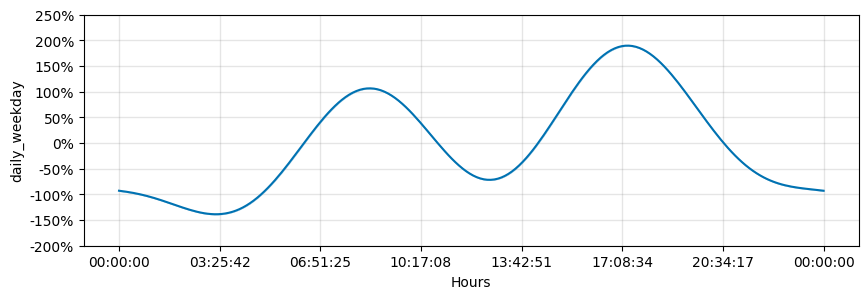

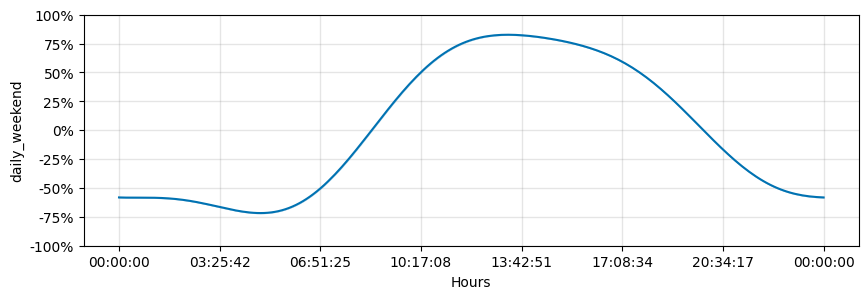

In [ ]:
forecast = model.predict(future)
from prophet.plot import plot_seasonality
fig3 = plot_seasonality(model, 'daily_weekday', figsize=(10, 3))
plt.show()
fig4 = plot_seasonality(model, 'daily_weekend', figsize=(10, 3))
plt.show()

## 계절성 규제(Regularizing seasonality)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.15605e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.02913e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


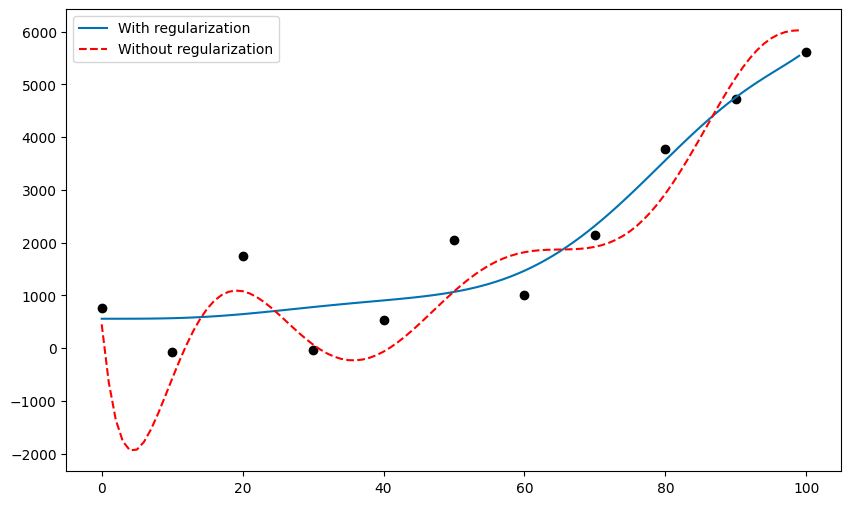

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(5)

x_pure = np.arange(0, 100, 1)
y_pure = (x_pure - 20) ** 2 + 50

num_points = 12
x0 = np.arange(0, num_points * 10, 10)
y0 = ((x0 - 20) ** 2 + 50) + np.random.normal(0, 700, num_points)

polynomial_features= PolynomialFeatures(degree=8)
x_poly = polynomial_features.fit_transform(x_pure.reshape(-1, 1))
x0_poly = polynomial_features.fit_transform(x0.reshape(-1, 1))

y1 = Ridge(alpha=0).fit(x0_poly, y0).predict(x_poly)
y2 = Ridge(alpha=1000).fit(x0_poly, y0).predict(x_poly)
y3 = Ridge(alpha=1000000000).fit(x0_poly, y0).predict(x_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x0[:-1], y0[:-1], c='k')
plt.plot(x_pure, y3, label='With regularization', ls='-', c='#0072B2')
plt.plot(x_pure, y1, label='Without regularization', ls='--', c='r')
plt.legend()
plt.show()

## 전역적 계절성 규제(Global seasonality regularization)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Book7/data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.01)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/jhf1kk23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/cy6xz5sl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77125', 'data', 'file=/tmp/tmplefug71y/jhf1kk23.json', 'init=/tmp/tmplefug71y/cy6xz5sl.json', 'output', 'file=/tmp/tmplefug71y/prophet_modelgassaj8f/prophet_model-20250709012406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


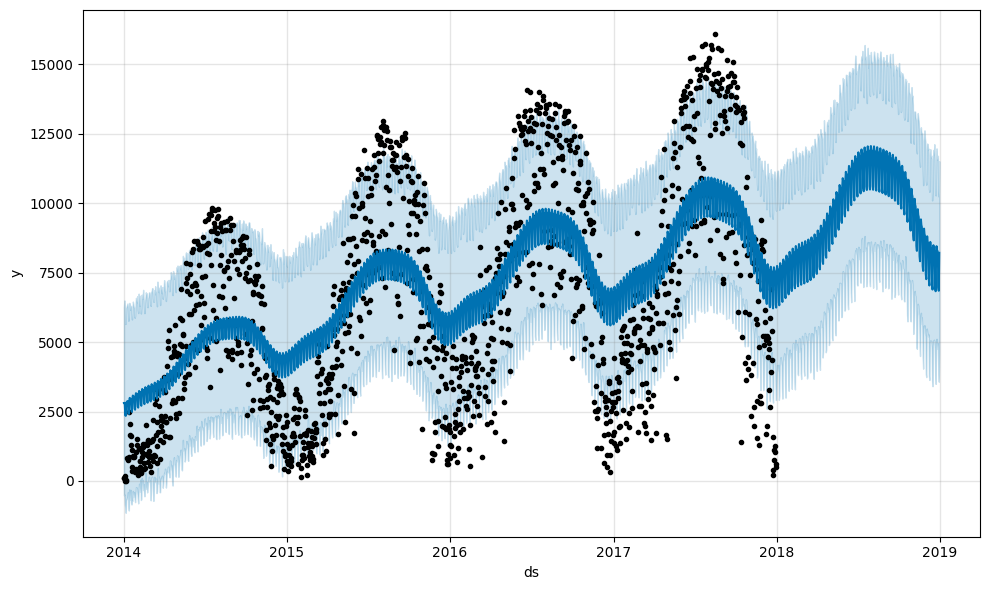

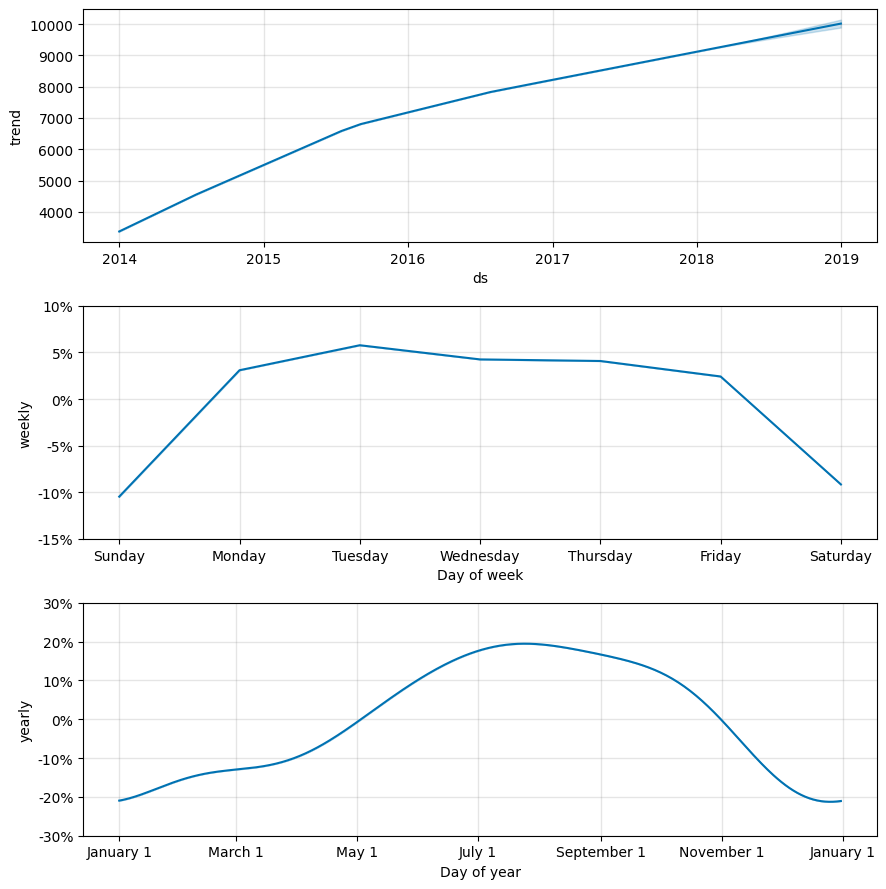

In [ ]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
from prophet.plot import seasonality_plot_df, set_y_as_percent
from matplotlib.dates import (
    MonthLocator,
    num2date,
    AutoDateLocator,
    AutoDateFormatter,
)
from matplotlib.ticker import FuncFormatter

def plot_seasonality2(m, name, ax=None, uncertainty=True, figsize=(10, 6), ls='-', c='#0072B2', label=''):
    """Plot a custom seasonal component.
    Parameters
    ----------
    m: Prophet model.
    name: Seasonality name, like 'daily', 'weekly'.
    ax: Optional matplotlib Axes to plot on. One will be created if
        this is not provided.
    uncertainty: Optional boolean to plot uncertainty intervals, which will
        only be done if m.uncertainty_samples > 0.
    figsize: Optional tuple width, height in inches.
    Returns
    -------
    a list of matplotlib artists
    """
    artists = []
    if not ax:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    # Compute seasonality from Jan 1 through a single period.
    start = pd.to_datetime('2017-01-01 0000')
    period = m.seasonalities[name]['period']
    end = start + pd.Timedelta(days=period)
    plot_points = 200
    days = pd.to_datetime(np.linspace(start.value, end.value, plot_points))
    df_y = seasonality_plot_df(m, days)
    seas = m.predict_seasonal_components(df_y)
    artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls=ls,
                        c=c, label=label)
    if uncertainty and m.uncertainty_samples:
        artists += [ax.fill_between(
            df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],
            seas[name + '_upper'], color='#0072B2', alpha=0.2)]
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    n_ticks = 8
    xticks = pd.to_datetime(np.linspace(start.value, end.value, n_ticks)
        ).to_pydatetime()
    ax.set_xticks(xticks)
    if period <= 2:
        fmt_str = '{dt:%T}'
    elif name == 'weekly':
        fmt_str = '{dt:%A}'
    elif period < 14:
        fmt_str = '{dt:%m}/{dt:%d} {dt:%R}'
    else:
        fmt_str = '{dt:%m}/{dt:%d}'
    ax.xaxis.set_major_formatter(FuncFormatter(
        lambda x, pos=None: fmt_str.format(dt=num2date(x))))
    ax.set_xlabel('ds')
    ax.set_ylabel(name)
    if m.seasonalities[name]['mode'] == 'multiplicative':
        ax = set_y_as_percent(ax)
    return artists

def compare_seasonality(seasonality,
                        model_list,
                        figsize=(10, 3),
                        ls=['-', '--', '-.', ':'],
                        c=['#0072B2', 'r', 'tab:orange', 'tab:green']):
    fig = plt.figure(facecolor='w', figsize=figsize)
    ax = fig.add_subplot(111)
    for model in range(len(model_list)):
        plot_seasonality2(model_list[model],
                          seasonality,
                          ax=ax,
                          ls=ls[model],
                          c=c[model],
                          label='Seasonality prior scale: {}'.format(model_list[model].seasonality_prior_scale))
    plt.legend()
    plt.show()

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/vvdrqhpv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/1p09eht3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30240', 'data', 'file=/tmp/tmplefug71y/vvdrqhpv.json', 'init=/tmp/tmplefug71y/1p09eht3.json', 'output', 'file=/tmp/tmplefug71y/prophet_modeliz73ugdy/prophet_model-20250709012431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model3 = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.01)
model3.fit(df)
future3 = model3.make_future_dataframe(periods=365)
forecast3 = model3.predict(future3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/yfdpt5qf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/rxn_uqvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74403', 'data', 'file=/tmp/tmplefug71y/yfdpt5qf.json', 'init=/tmp/tmplefug71y/rxn_uqvx.json', 'output', 'file=/tmp/tmplefug71y/prophet_modeljgqc87vl/prophet_model-20250709012435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model4 = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                seasonality_prior_scale=.005)
model4.fit(df)
future4 = model4.make_future_dataframe(periods=365)
forecast4 = model4.predict(future4)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/f_cx07ua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/1c98lpk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9139', 'data', 'file=/tmp/tmplefug71y/f_cx07ua.json', 'init=/tmp/tmplefug71y/1c98lpk3.json', 'output', 'file=/tmp/tmplefug71y/prophet_modelr1pv0kbs/prophet_model-20250709012438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/tmp/ipython-input-35-2635826099.py:37: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls=ls,
/tmp/ipython-input-35-2635826099.py:41: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],
/tmp/ipython-input-35-2635826099.py:37: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'

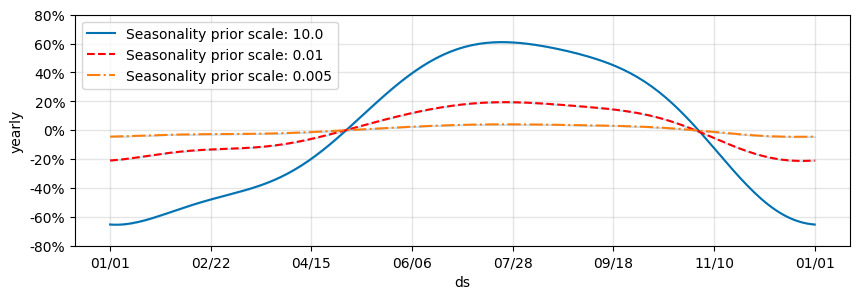

In [ ]:
compare_seasonality('yearly', [model, model3, model4])

/tmp/ipython-input-35-2635826099.py:37: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls=ls,
/tmp/ipython-input-35-2635826099.py:41: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],
/tmp/ipython-input-35-2635826099.py:37: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'

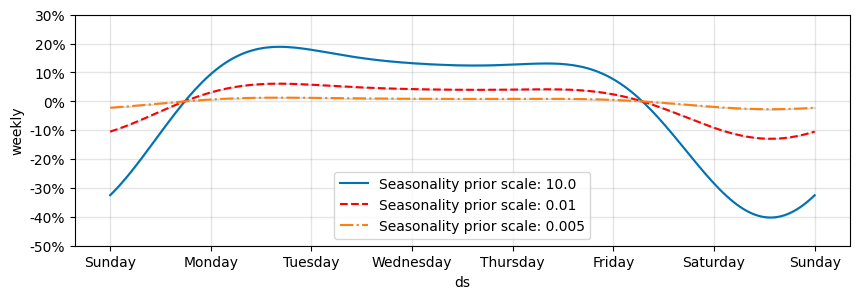

In [ ]:
compare_seasonality('weekly', [model, model3, model4])

## 국소적 계절성 규제(Local seasonality regularization)

In [ ]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                weekly_seasonality=False)

In [ ]:
model.add_seasonality(name='weekly',
                      period=7,
                      fourier_order=4,
                      prior_scale=0.01)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/c_jac90l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplefug71y/3vqoncla.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54295', 'data', 'file=/tmp/tmplefug71y/c_jac90l.json', 'init=/tmp/tmplefug71y/3vqoncla.json', 'output', 'file=/tmp/tmplefug71y/prophet_model3r92pmxd/prophet_model-20250709012452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:24:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


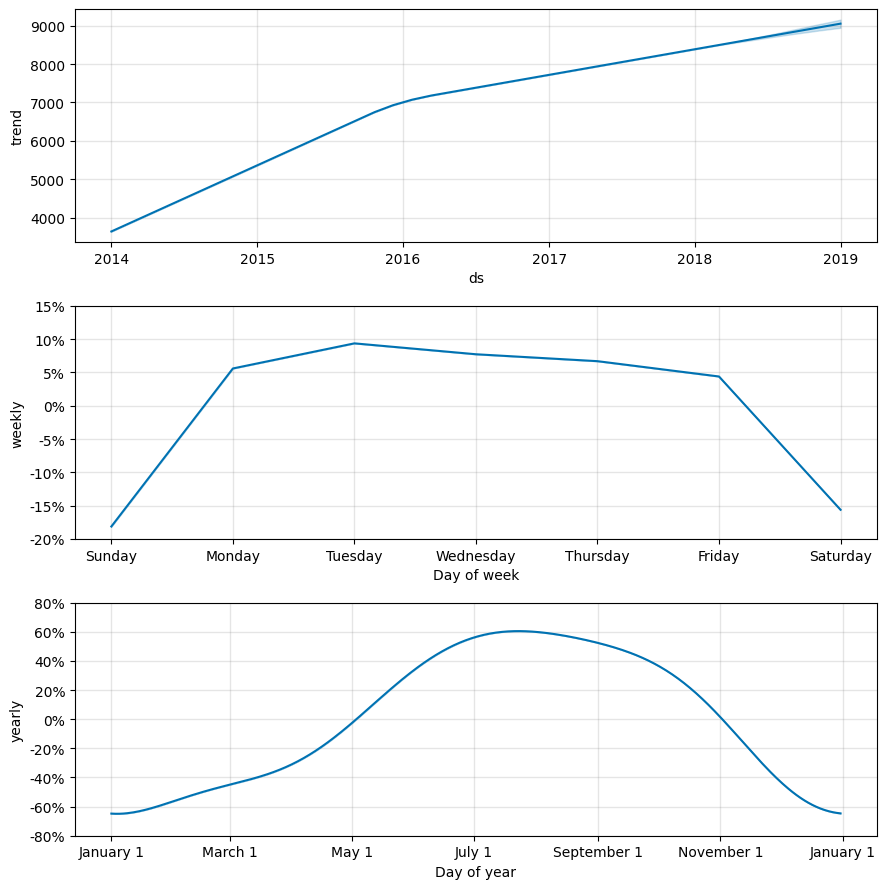

In [ ]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig2 = model.plot_components(forecast)
plt.show()